# Variance shift detection with ruptures

In [1]:
import ruptures as rpt
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import os

In [2]:
##############################
# Load data from emodynamics #
##############################
path_to_emo_signal = os.path.join("..", "src", "idmdl", "tweets_emo_date_W3.csv")
df_emo = pd.read_csv(path_to_emo_signal)

path_to_pol_signal = os.path.join("..", "src", "idmdl", "tweets_pol_date_W3.csv")
df_pol = pd.read_csv(path_to_pol_signal)

In [3]:
penalty = 1.5
mdl_emo = rpt.Pelt(model="rbf").fit(np.array(df_emo["resonance"]))
shift_locations_emo = mdl_emo.predict(pen=penalty)

mdl_pol = rpt.Pelt(model="rbf").fit(np.array(df_pol["resonance"]))
shift_locations_pol = mdl_pol.predict(pen=penalty)

In [8]:
# Plot the change points - from the medium article:
def plot_change_points(time, signal, shifts, title):
    time = pd.to_datetime(time)
    plt.figure(figsize=(16,4))
    for x in shifts:
        plt.axvline(time[x-1], lw=2, color='red')
    plt.plot(time, signal)
    plt.title(title)


In [11]:
plot_change_points(df_emo["date"], df_emo["resonance"], shift_locations_emo, title="Variance shift points in the emo signal")

KeyError: 194

<Figure size 1152x288 with 0 Axes>

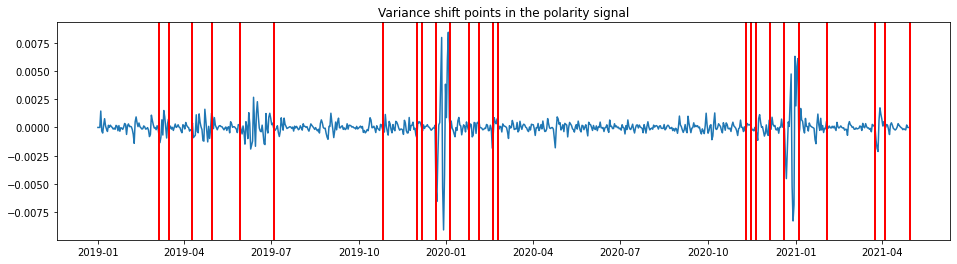

In [7]:
plot_change_points(df_pol["date"], df_pol["resonance"], shift_locations_pol, title="Variance shift points in the polarity signal" )

In [7]:
for i, loc in enumerate(shift_locations_emo):
    print(f'location number {i+1} is {df_emo["date"][loc-1]}')
    if loc in shift_locations_pol:
        print(f'This shift (i.e., shift number {i+1}) was also detected in the polarity signal')

location number 1 is 2019-07-14
location number 2 is 2019-08-23
location number 3 is 2019-12-21
This shift (i.e., shift number 3) was also detected in the polarity signal
location number 4 is 2019-12-31
location number 5 is 2020-01-30
location number 6 is 2020-02-04
This shift (i.e., shift number 6) was also detected in the polarity signal
location number 7 is 2020-03-25
location number 8 is 2020-06-18
location number 9 is 2020-08-22
location number 10 is 2020-10-06
location number 11 is 2020-10-11
location number 12 is 2020-12-20
This shift (i.e., shift number 12) was also detected in the polarity signal
location number 13 is 2021-01-14
location number 14 is 2021-03-25
This shift (i.e., shift number 14) was also detected in the polarity signal
location number 15 is 2021-03-30
location number 16 is 2021-04-30
This shift (i.e., shift number 16) was also detected in the polarity signal


In [57]:
general_shifts = [loc for loc in shift_locations_emo if loc in shift_locations_pol]

In [58]:
for i, loc in enumerate(general_shifts):
    print(f'location number {i+1} is {df["date"][loc-1]}')

location number 1 is 2019-12-21
location number 2 is 2020-02-04
location number 3 is 2020-12-20
location number 4 is 2021-03-25
location number 5 is 2021-04-30


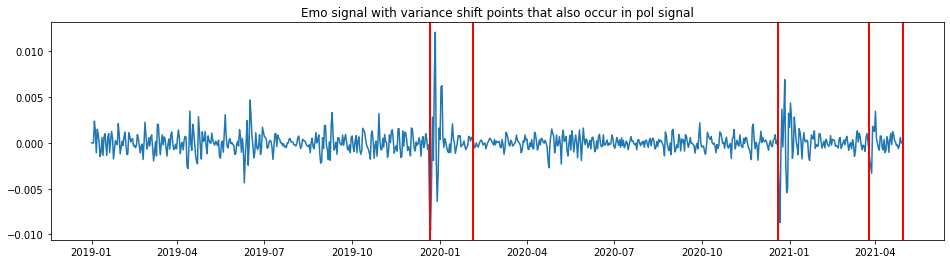

In [59]:
plot_change_points(df_emo["date"], df_emo["resonance"], general_shifts, title = "Emo signal with variance shift points that also occur in pol signal")

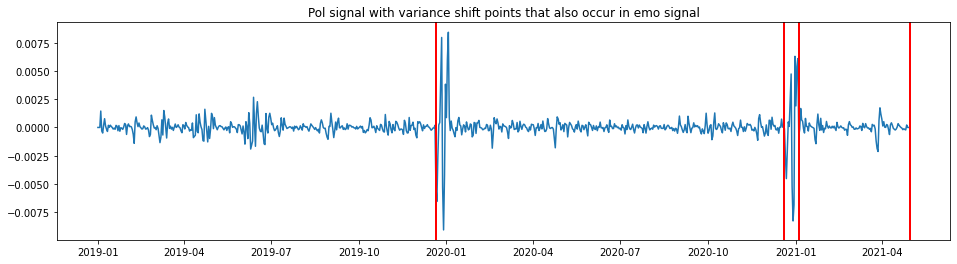

In [55]:
plot_change_points(df_pol["date"], df_pol["resonance"], general_shifts, title = "Pol signal with variance shift points that also occur in emo signal")